<a href="https://colab.research.google.com/github/paulomarc49/ETo_climate/blob/main/ETo_weather_prediction_reproducibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. ETo weather prediction

## 1.1. Data Loading

The data of years 2017, 2018, 2019 and 2020 were previus treated, joined and saved as numpy files in a Linux system and is stored in the Google Drive repositories:

* **2017:** https://drive.google.com/file/d/1xLvLI0ftcs6M32fTA3-DBdAplFCDmGQ3/view?usp=drive_link
* **2018:** https://drive.google.com/file/d/1cx0pssucEfZiwJQCCUTGvGssKNWx1COa/view?usp=sharing
* **2019:** https://drive.google.com/file/d/1qGx75lNpyVC-1N9Kr8TjJ-piuSJxLTr2/view?usp=drive_link
* **2020:** https://drive.google.com/file/d/15ENdwtDGKiPjZVLn7zTwMl9ZOVq4__OS/view?usp=sharing

In [ ]:
!pip install sklearn-som

import numpy                  as np
import pandas                 as pd
import matplotlib.pyplot      as plt
import gdown
import joblib
import os
from   google.colab           import drive
from   joblib                 import Parallel, delayed
from   sklearn.pipeline       import Pipeline
from   sklearn.preprocessing  import StandardScaler
from   sklearn.base           import BaseEstimator, ClusterMixin
from   sklearn_som.som        import SOM as SklearnSOM
from   google.colab           import drive
from   tqdm                   import tqdm

drive.mount('/content/drive')

In [ ]:
# Load preprocessed data for the years 2017, 2018, 2019, and 2020 as a NumPy array.
# If Drive access is unavailable, download the data from the provided links and edit your directory.

numpy_data_2017 = np.load('/content/drive/MyDrive/DATA_ETO_NUMPY/2017_numpy.npy')
print("Year 2017 original data shape: ", numpy_data_2017.shape)
numpy_data_2018 = np.load('/content/drive/MyDrive/DATA_ETO_NUMPY/2018_numpy.npy')
print("Year 2018 original data shape: ", numpy_data_2018.shape)
numpy_data_2019 = np.load('/content/drive/MyDrive/DATA_ETO_NUMPY/2019_numpy.npy')
print("Year 2019 original data shape: ", numpy_data_2019.shape)
numpy_data_2020 = np.load('/content/drive/MyDrive/DATA_ETO_NUMPY/2020_numpy.npy')
print("Year 2020 original data shape: ", numpy_data_2020.shape)

Year 2017 original data shape:  (62415, 171, 192)
Year 2018 original data shape:  (62415, 171, 192)
Year 2019 original data shape:  (62415, 171, 192)
Year 2020 original data shape:  (62586, 171, 192)


In [ ]:
# Data flattening
# Input data is an array of three dimentions with the shape: ( d * y, x, 8 variables * 24 hours ), where:
# d: number of days,
# y: Pixel "Y",
# x: Pixel "X",
# 8 variables * 24 per 24 hours

numpy_data_2017 = numpy_data_2017.reshape(-1, 192)
numpy_data_2018 = numpy_data_2018.reshape(-1, 192)
numpy_data_2019 = numpy_data_2019.reshape(-1, 192)
numpy_data_2020 = numpy_data_2020.reshape(-1, 192)

print("The shapes of the flattened 2017, 2018, 2019, and 2020 input data are:\n"
      f"2017: {numpy_data_2017.shape}\n"
      f"2018: {numpy_data_2018.shape}\n"
      f"2019: {numpy_data_2019.shape}\n"
      f"2020: {numpy_data_2020.shape}")

The shapes of the flattened 2017, 2018, 2019, and 2020 input data are:
2017: (10672965, 192)
2018: (10672965, 192)
2019: (10672965, 192)
2020: (10702206, 192)


## 1.2. Implementation with sci-kit learn SOM

In [ ]:
# Making Custom sklearn-som package

class CustomSOM(BaseEstimator, ClusterMixin):
    def __init__(self, m=1, n=1, dim=1, sigma=1, lr=1, max_iter=1, random_state=None):
        self.m = m
        self.n = n
        self.dim = dim
        self.sigma = sigma
        self.lr = lr
        self.max_iter = max_iter
        self.random_state = random_state
        self.model_ = None

    def fit(self, X, y=None):
        self.model_ = SklearnSOM(m=self.m, n=self.n, dim=self.dim, lr=self.lr, max_iter=self.max_iter, random_state=self.random_state)
        self.model_.fit(X)
        return self

    def predict(self, X):
        return self.model_.predict(X)

    def transform(self, X):
        return self.model_.transform(X)

    def score(self, X, y=None):
        distancias_punto_centroide = self.transform(X)
        distorsion_total = 0
        for i in range(len(distancias_punto_centroide)):
            distancias_minimas_cuadradas = (np.min(distancias_punto_centroide[i]))**2
            distorsion_total += distancias_minimas_cuadradas
        return distorsion_total

## 1.3. Normalization

In [ ]:
# Initialize the scaler
scaler = joblib.load('/content/drive/MyDrive/ETo_weather/scaler.pkl')

# Define the file output paths for the normalized data:

folder_path = '/content/ETo_prediction'
os.mkdir(folder_path)

file_paths = [
    '/content/ETo_prediction/2017_numpy_normalized.npy',
    '/content/ETo_prediction/2018_numpy_normalized.npy',
    '/content/ETo_prediction/2019_numpy_normalized.npy',
    '/content/ETo_prediction/2020_numpy_normalized.npy'
]

# Define the numpy datasets
numpy_datasets = [numpy_data_2017, numpy_data_2018, numpy_data_2019, numpy_data_2020]

for i, (data, path) in enumerate(zip(numpy_datasets, file_paths)):
    if not os.path.exists(path):
        normalized_data = scaler.transform(data)
        np.save(path, normalized_data, allow_pickle=False)
        print(f"Data for year {2017 + i} normalized and saved.")
        print(f"Year {2017 + i} normalized data shape: {normalized_data.shape}")
    else:
        print(f"File for year {2017 + i} already exists. Skipping.")

Data for year 2017 normalized and saved.
Year 2017 normalized data shape: (10672965, 192)
Data for year 2018 normalized and saved.
Year 2018 normalized data shape: (10672965, 192)
Data for year 2019 normalized and saved.
Year 2019 normalized data shape: (10672965, 192)
Data for year 2020 normalized and saved.
Year 2020 normalized data shape: (10702206, 192)


In [ ]:
# Load the normalized data:
numpy_data_2017 = np.load('/content/ETo_prediction/2017_numpy_normalized.npy')
numpy_data_2018 = np.load('/content/ETo_prediction/2018_numpy_normalized.npy')
numpy_data_2019 = np.load('/content/ETo_prediction/2019_numpy_normalized.npy')
numpy_data_2020 = np.load('/content/ETo_prediction/2020_numpy_normalized.npy')

## 1.4. Prediction


In [ ]:
# Define file paths for saving the labels for each year
label_paths = {
    2017: '/content/ETo_prediction/2017_ETo_weahter_labels.npy',
    2018: '/content/ETo_prediction/2018_ETo_weahter_labels.npy',
    2019: '/content/ETo_prediction/2019_ETo_weahter_labels.npy',
    2020: '/content/ETo_prediction/2020_ETo_weahter_labels.npy'
}

# Load the trained ETo weather SOM model (From exercise of the ETo_weather_training_reproducibility.ipynb)
som_model = joblib.load('path_to_a_trained_model') # AUTHOR ONLY: som_model = joblib.load('/content/drive/MyDrive/ETo_weather/ETo_weather_som_model.pkl')

# Dictionary of numpy data for each year
numpy_data_dict = {
    2017: numpy_data_2017,
    2018: numpy_data_2018,
    2019: numpy_data_2019,
    2020: numpy_data_2020
}

# Function to predict SOM labels for a chunk of data
def predict_chunk(som_model, data_chunk):
    return som_model.predict(data_chunk)

# Function to divide the data into chunks and process them in parallel
def process_data_in_parallel(som_model, data, n_jobs=-1, chunk_size=None):
    n_samples = data.shape[0]
    if chunk_size is None:
        chunk_size = n_samples // 90
    data_chunks = [data[i:i + chunk_size] for i in range(0, n_samples, chunk_size)]

    # Parallel processing of each chunk
    results = Parallel(n_jobs=n_jobs)(
        delayed(predict_chunk)(som_model, chunk) for chunk in data_chunks
    )

    # Join the predicted labels
    return np.concatenate(results)

# Iterate over each year and save labels if the file doesn't exist
for year, data in numpy_data_dict.items():
    outpath = label_paths[year]

    # Check if the labels file already exists
    if not os.path.exists(outpath):
        # Process data in parallel and predict labels
        labels_SOM_train = process_data_in_parallel(som_model, data)

        # Save the labels array
        np.save(outpath, labels_SOM_train.astype(np.int16), allow_pickle=False)
        print(f'Labels array for {year} saved to: {outpath}')
        print(f"Year {year} output data shape: {labels_SOM_train.shape}")
    else:
        print(f'File already exists for {year} at {outpath}, skipping label generation.')


In [ ]:
# Define file paths for labels and ETo_weather datasets for each year
label_paths = {
    2017: '/content/ETo_prediction/2017_ETo_weahter_labels.npy',
    2018: '/content/ETo_prediction/2018_ETo_weahter_labels.npy',
    2019: '/content/ETo_prediction/2019_ETo_weahter_labels.npy',
    2020: '/content/ETo_prediction/2020_ETo_weahter_labels.npy',
}

eto_weather_paths = {
    2017: '/content/ETo_prediction/ETo_weather_2017.npy',
    2018: '/content/ETo_prediction/ETo_weather_2018.npy',
    2019: '/content/ETo_prediction/ETo_weather_2019.npy',
    2020: '/content/ETo_prediction/ETo_weather_2020.npy',
}

# Dictionary of numpy data for each year
numpy_data_dict = {
    2017: numpy_data_2017,
    2018: numpy_data_2018,
    2019: numpy_data_2019,
    2020: numpy_data_2020,
}

# Iterate over each year, concatenate labels with data, and save ETo_weather
for year, data in numpy_data_dict.items():
    outpath_labels = label_paths[year]
    outpath_ETo_weather = eto_weather_paths[year]

    # Check if the ETo_weather file already exists
    if not os.path.exists(outpath_ETo_weather):
        # Load the predicted labels for the corresponding year
        labels_SOM_train = np.load(outpath_labels)
        print(f'Shape of labels for {year}: {labels_SOM_train.shape}')
        print(f'Shape of data for {year}: {data.shape}')

        # Concatenate the labels with the original data
        ETo_weather = np.concatenate((data, labels_SOM_train.reshape(-1, 1)), axis=1)

        # Save the concatenated dataset
        np.save(outpath_ETo_weather, ETo_weather.astype(np.int16), allow_pickle=False)
        print(f'Joined ETo_weather data and labels shape for {year}: {ETo_weather.shape}')
        print(f'ETo_weather array for {year} saved to: {outpath_ETo_weather}\n')
    else:
        print(f'File already exists for {year} at {outpath_ETo_weather}, skipping.')



Shape of labels for 2017: (10672965,)
Shape of data for 2017: (10672965, 192)
Joined ETo_weather data and labels shape for 2017: (10672965, 193)
ETo_weather array for 2017 saved to: /content/ETo_prediction/ETo_weather_2017.npy

Shape of labels for 2018: (10672965,)
Shape of data for 2018: (10672965, 192)
Joined ETo_weather data and labels shape for 2018: (10672965, 193)
ETo_weather array for 2018 saved to: /content/ETo_prediction/ETo_weather_2018.npy

Shape of labels for 2019: (10672965,)
Shape of data for 2019: (10672965, 192)
Joined ETo_weather data and labels shape for 2019: (10672965, 193)
ETo_weather array for 2019 saved to: /content/ETo_prediction/ETo_weather_2019.npy

Shape of labels for 2020: (10702206,)
Shape of data for 2020: (10702206, 192)
Joined ETo_weather data and labels shape for 2020: (10702206, 193)
ETo_weather array for 2020 saved to: /content/ETo_prediction/ETo_weather_2020.npy



# 2. Visualization of ETo Weather Clusters Obtained in the Test Dataset.

In [ ]:
# Unflattening operations for ETo_weather clusters visualization:
eto_weather_paths = {
    2017: '/content/ETo_prediction/ETo_weather_2017.npy',
    2018: '/content/ETo_prediction/ETo_weather_2018.npy',
    2019: '/content/ETo_prediction/ETo_weather_2019.npy',
    2020: '/content/ETo_prediction/ETo_weather_2020.npy',
}

eto_weather_reshaped_paths = {
    2017: '/content/ETo_prediction/ETo_weather_2017_unflattened.npy',
    2018: '/content/ETo_prediction/ETo_weather_2018_unflattened.npy',
    2019: '/content/ETo_prediction/ETo_weather_2019_unflattened.npy',
    2020: '/content/ETo_prediction/ETo_weather_2020_unflattened.npy',
}

# Parameters for unflattening: days per year, grid size (y, x), and number of variables
n_variables = 192
grid_size = (171, 171)  # y and x dimensions

# Define number of days for each year (consider leap year for 2020)
days_per_year = {
    2017: 365,
    2018: 365,
    2019: 365,
    2020: 366,  # Leap year
}

# Function for data unflattening:
def unflatten_data(year, data):
    d = days_per_year[year]
    y, x = grid_size
    print(f"Joined ETo_weather data and labels shape for {year}: {data.shape}")
    ETo_weather_unflattened = data.reshape(d * y, x, 193)
    print(f"Unflattened joined ETo_weather data and labels shape for {year}: {ETo_weather_unflattened.shape}")
    return ETo_weather_unflattened

# Iterate over each year, unflattening, and save if not already saved
for year, outpath in eto_weather_reshaped_paths.items():
    if not os.path.exists(outpath):
        # Load the original ETo_weather data
        eto_weather_data = np.load(eto_weather_paths[year])

        # Unflattening of the data for the current year
        eto_weather_reshaped = unflatten_data(year, eto_weather_data)

        # Save the reshaped array
        np.save(outpath, eto_weather_reshaped.astype(np.int16), allow_pickle=False)
        print(f'Unflattened joined ETo_weather data and labels for {year} saved to: {outpath}\n')
    else:
        print(f'File already exists for {year} at {outpath}, skipping.')


Joined ETo_weather data and labels shape for 2017: (10672965, 193)
Unflattened joined ETo_weather data and labels shape for 2017: (62415, 171, 193)
Unflattened joined ETo_weather data and labels for 2017 saved to: /content/ETo_prediction/ETo_weather_2017_unflattened.npy

Joined ETo_weather data and labels shape for 2018: (10672965, 193)
Unflattened joined ETo_weather data and labels shape for 2018: (62415, 171, 193)
Unflattened joined ETo_weather data and labels for 2018 saved to: /content/ETo_prediction/ETo_weather_2018_unflattened.npy

Joined ETo_weather data and labels shape for 2019: (10672965, 193)
Unflattened joined ETo_weather data and labels shape for 2019: (62415, 171, 193)
Unflattened joined ETo_weather data and labels for 2019 saved to: /content/ETo_prediction/ETo_weather_2019_unflattened.npy

Joined ETo_weather data and labels shape for 2020: (10702206, 193)
Unflattened joined ETo_weather data and labels shape for 2020: (62586, 171, 193)
Unflattened joined ETo_weather data 

In [ ]:
# LOAD THE DATA OF THE YEARS 2017, 2018, 2019, 2020

ETo_weather_2017_unflattened = np.load('/content/ETo_prediction/ETo_weather_2017_unflattened.npy')
print('The final data of the year 2017 has a shape of: ', ETo_weather_2017_unflattened.shape)
ETo_weather_2018_unflattened = np.load('/content/ETo_prediction/ETo_weather_2018_unflattened.npy')
print('The final data of the year 2018 has a shape of: ', ETo_weather_2018_unflattened.shape)
ETo_weather_2019_unflattened = np.load('/content/ETo_prediction/ETo_weather_2019_unflattened.npy')
print('The final data of the year 2019 has a shape of: ', ETo_weather_2019_unflattened.shape)
ETo_weather_2020_unflattened = np.load('/content/ETo_prediction/ETo_weather_2020_unflattened.npy')
print('The final data of the year 2020 has a shape of: ', ETo_weather_2020_unflattened.shape)

The final data of the year 2017 has a shape of:  (62415, 171, 193)
The final data of the year 2018 has a shape of:  (62415, 171, 193)
The final data of the year 2019 has a shape of:  (62415, 171, 193)
The final data of the year 2020 has a shape of:  (62586, 171, 193)


In [ ]:
%matplotlib inline

!pip install ipywidgets>=7,<8

import numpy              as np
import ipywidgets         as widgets
import matplotlib.pyplot  as plt
import joblib
from IPython.display      import display
from PIL                  import Image
from matplotlib.widgets   import Cursor
from tqdm                 import tqdm
from google.colab         import output

/bin/bash: line 1: 8: No such file or directory


In [ ]:
output.enable_custom_widget_manager()

# Slider widget to select the day
dropdown2 = widgets.IntSlider(min=0, max=729, step=1, description='DAY:')

# Play widget to automatically step through days
play = widgets.Play(
    value=0,
    min=0,
    max=729,
    step=1,
    interval=1000,
    description="Press play",
    disabled=False
)

def Dropdown_Menu(day=1):
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    # Adjust space between the plots
    plt.subplots_adjust(wspace=-0.02, hspace=-0.15)

    # Access each subplot using the 2D array structure
    ax_2017 = axes[0, 0]
    ax_2018 = axes[0, 1]
    ax_2019 = axes[1, 0]
    ax_2020 = axes[1, 1]

    fig.dpi = 90

    y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    z = list(range(0, 366))

    day_index = z.index(round(day))

    day_2017 = ETo_weather_2017_unflattened[0 + (171*(day_index)) : 171 + (171*(day_index))]
    day_2018 = ETo_weather_2018_unflattened[0 + (171*(day_index)) : 171 + (171*(day_index))]
    day_2019 = ETo_weather_2019_unflattened[0 + (171*(day_index)) : 171 + (171*(day_index))]
    day_2020 = ETo_weather_2020_unflattened[0 + (171*(day_index)) : 171 + (171*(day_index))]

    data_2017 = day_2017[:,:,round(192)]
    data_2018 = day_2018[:,:,round(192)]
    data_2019 = day_2019[:,:,round(192)]
    data_2020 = day_2020[:,:,round(192)]

    # Clear the axes to update the plots
    ax_2017.clear()
    ax_2018.clear()
    ax_2019.clear()
    ax_2020.clear()

    # Display settings for plots
    scale_min = [-1.0, -0.05, 5.00, 0.00, 0.03, 0, 0, 0, 0]
    scale_max = [0.9, 0.20, 31.00, 0.25, 0.08, 4, 3, 5, 36]
    dynamic_title = "Clusters "

    im  = ax_2017.imshow(data_2017, cmap='gnuplot2', vmin=0, vmax=36, alpha=1, interpolation='bilinear')
    im2 = ax_2018.imshow(data_2018, cmap='gnuplot2', vmin=0, vmax=36, alpha=1, interpolation='bilinear')
    im3 = ax_2019.imshow(data_2019, cmap='gnuplot2', vmin=0, vmax=36, alpha=1, interpolation='bilinear')
    im4 = ax_2020.imshow(data_2020, cmap='gnuplot2', vmin=0, vmax=36, alpha=1, interpolation='bilinear')

    # Turn off axis ticks and labels for all subplots
    for ax in [ax_2017, ax_2018, ax_2019, ax_2020]:
        ax.axis('off')

    ax_2017.set_title(dynamic_title+f'Year 2017', color="steelblue")
    ax_2017.set_ylabel('Geographic pixel in Y axis')

    ax_2018.set_title(dynamic_title+f'Year 2018', color="steelblue")

    ax_2019.set_title(dynamic_title+f'Year 2019', color="steelblue")
    ax_2019.set_xlabel('Geographic pixel in X axis')
    ax_2019.set_ylabel('Geographic pixel in Y axis')

    ax_2020.set_title(dynamic_title+f'Year 2020', color="steelblue")
    ax_2020.set_xlabel('Geographic pixel in X axis')

    # Adjust the size of the colorbar using the `shrink` argument and other properties
    cbar1 = plt.colorbar(im, ax=ax_2017, label="", shrink=0.76, aspect=30)
    cbar2 = plt.colorbar(im2, ax=ax_2018, label="ETo weather clusters", shrink=0.76, aspect=30)
    cbar3 = plt.colorbar(im3, ax=ax_2019, label="", shrink=0.76, aspect=30)
    cbar4 = plt.colorbar(im4, ax=ax_2020, label="ETo weather clusters", shrink=0.76, aspect=30)

    # Show the plot
    plt.show()

# Link the play button to the slider
widgets.jslink((play, 'value'), (dropdown2, 'value'))
# Create an interactive widget for day selection
widgets.interact(Dropdown_Menu, day=dropdown2)

# Display the play button
widgets.HBox([play])

interactive(children=(IntSlider(value=0, description='DAY:', max=729), Output()), _dom_classes=('widget-intera…

# 3. Evaluation of Tested Dataset in Terms of Distortion

In [ ]:
# Load the normalized numpy data for 2017, 2018, 2019 and 2020.
numpy_data_2017_normalized = np.load('/content/ETo_prediction/2017_numpy_normalized.npy')
numpy_data_2018_normalized = np.load('/content/ETo_prediction/2018_numpy_normalized.npy')
numpy_data_2019_normalized = np.load('/content/ETo_prediction/2019_numpy_normalized.npy')
numpy_data_2020_normalized = np.load('/content/ETo_prediction/2020_numpy_normalized.npy')

# Concatenate normalized numpy data for 2017, 2018, 2019 and 2020.
numpy_data_combined = np.concatenate((
    numpy_data_2017_normalized,
    numpy_data_2018_normalized,
    numpy_data_2019_normalized,
    numpy_data_2020_normalized
), axis=0)

# Number of days in each month for two consecutive years (2017, 2018, 2019 and 2020).
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
                  31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
                  31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
                  31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Load the trained SOM model.
som_model = joblib.load('path_to_a_trained_model') # AUTHOR ONLY: som_model = joblib.load('/content/drive/MyDrive/ETo_weather/ETo_weather_som_model.pkl')
# List to store distortion scores for each period.
ETo_weather_distortion = []

# Initialize day accumulators to track the range of days being processed.
day_acumulator_t0 = 0
day_acumulator_t1 = 0

# Loop through 48 periods (12 months in each of the two years).
for i in range(48):
    day_acumulator_t0 = day_acumulator_t1
    day_acumulator_t1 = day_acumulator_t1 + days_per_month[i]
    numpy_data_train_score = numpy_data_combined[day_acumulator_t0 * 171 * 171 : day_acumulator_t1 * 171 * 171]
    distortion = som_model.score(numpy_data_train_score)
    ETo_weather_distortion.append(distortion)

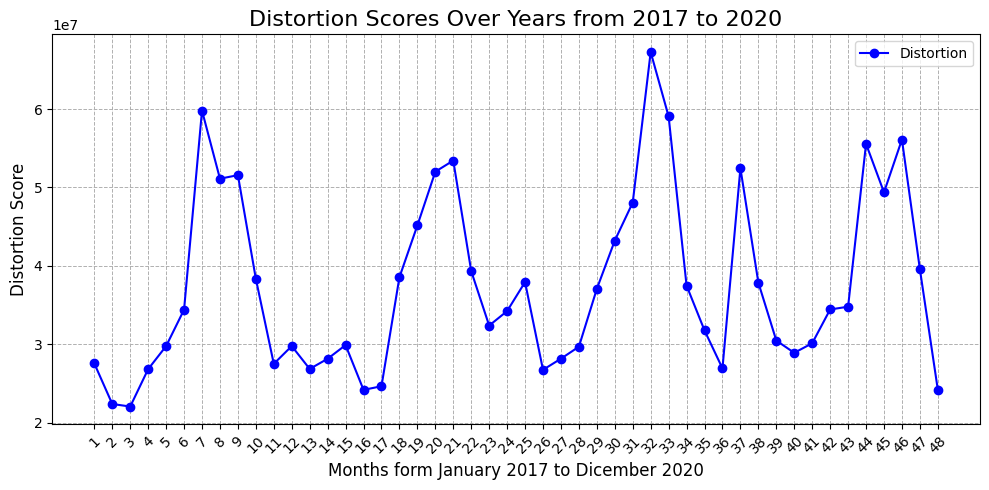

In [ ]:
from matplotlib.ticker import MultipleLocator

# Generate x-axis labels (indices of data points).
x = list(range(1,len(ETo_weather_distortion)+1))

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(x, ETo_weather_distortion, marker='o', linestyle='-', color='b', label='Distortion')
plt.title('Distortion Scores Over Years from 2017 to 2020', fontsize=16)
plt.xlabel('Months form January 2017 to Dicember 2020', fontsize=12)
plt.ylabel('Distortion Score', fontsize=12)
plt.xticks(ticks=range(1, len(ETo_weather_distortion)+1), fontsize=10, rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()